### ИДЗ1 Функциональный анализ. гр.9383 Ноздрин В.Я.

В данной работе реализована функция **generatePolyhedron**, которая генерирует массив точек
$A = \begin{bmatrix}
    a_{11} & a_{12} & 0 \\
    a_{21} & 0 & a_{23} \\
    0 & a_{32} & a_{33} \\
    a_{41} & 0 & 0 \\
    0 & a_{52} & 0 \\
    0 & 0 & a_{63} 
\end{bmatrix}$, соответствующий выпуклому многограннику в положительной четверти пространства. 

In [1]:
import math,random as rm, time

In [2]:
def generatePolyhedron(rmin=1, rmax=10, Rmin=5, Rmax=15):
    rm.seed(time.time())
    A = {
        "11": 0, "12": 0,             # A1 = a11 a12 0
        "21": 0, "23": 0,             # A2 = a21 0 a23
        "32": 0, "33": 0,             # A3 = 0 a32 a33
        "41": rm.randint(Rmin, Rmax), # A4 = a41 0 0
        "52": rm.randint(Rmin, Rmax), # A5 = 0 a52 0
        "63": rm.randint(Rmin, Rmax), # A6 = 0 0 a63
    }
    k21 = A["52"] / A["41"]
    A["11"] = int(rm.randint(rmin, A["41"]))
    A["12"] = int(rm.randint(math.ceil(k21*(A["41"]-A["11"])), A["52"]))
    k13 = A["41"] / A["63"]
    A["23"] = int(rm.randint(rmin, A["63"]))
    A["21"] = int(rm.randint(int(k13*(A["63"]-A["23"])), A["41"]))
    k32 = A["63"] / A["52"]
    A["32"] = int(rm.randint(rmin, A["52"]))
    A["33"] = int(rm.randint(int(k32*(A["52"]-A["32"])), A["63"]))
    ptsArray = [
        [A["11"],A["12"],0],
        [A["21"],0,A["23"]],
        [0,A["32"],A["33"]],
        [A["41"],0,0],
        [0,A["52"],0],
        [0,0,A["63"]]
    ]
    return ptsArray

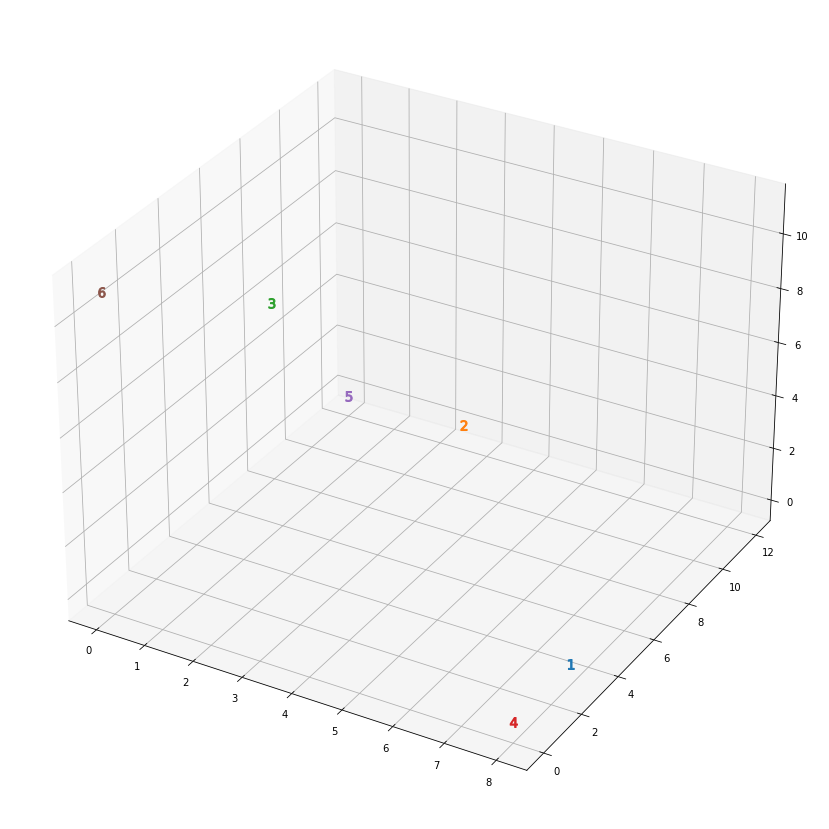

[8, 3, 0]
[7, 0, 10]
[0, 8, 6]
[8, 0, 0]
[0, 12, 0]
[0, 0, 11]


In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ptsArray = generatePolyhedron()
for (n,(x,y,z)) in enumerate(ptsArray,1):
    ax.scatter(x,y,z,marker=f"${n}$",s=100)
plt.show()
for pt in ptsArray:
    print(pt)